In [1]:
# import pandas
import pandas as pd

# import statsmodels.api as sm
import statsmodels.api as sm

# import matplotlib
import matplotlib.pyplot as plt


In [2]:
# load data
data = sm.datasets.co2.load_pandas()
co2 = data.data

* print top 5 rows

In [3]:
co2.head(5)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


* Resample timeseries using monthly averages and store the new timeseries as a Series `y`

In [4]:
co2.shape

(2284, 1)

In [5]:
co2_monthly = co2.resample('M').mean()

* print top 5 rows of 'y'

In [8]:
co2_monthly

,co2
1958-03-31,316.100000
1958-04-30,317.200000
1958-05-31,317.433333
1958-06-30,NaN
1958-07-31,315.625000
...,...
2001-08-31,369.425000
2001-09-30,367.880000
2001-10-31,368.050000
2001-11-30,369.375000


* check the missing values

In [10]:
co2_monthly.isnull().sum()

co2    5
dtype: int64

* replace missing values with last available value
    - if Feb 2010 is missing, use value from Jan 2010.

In [13]:
co2_monthly =  co2_monthly.fillna(method='ffill')

* plot timeseries `y`

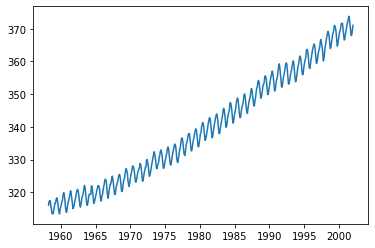

In [14]:
plt.plot(co2_monthly)

* Apply and plot:
    - additive seasonal decomposition
    - multiplicative seasonal decomposition

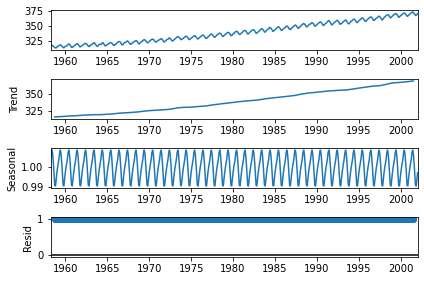

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_1 = seasonal_decompose(co2_monthly, model='multiplicative')
result_1.plot()
plt.show()

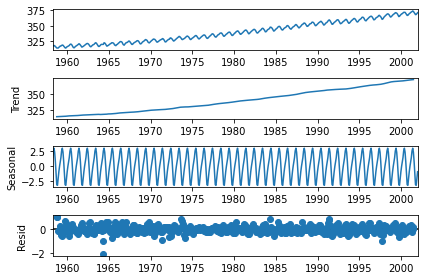

In [17]:
result_2 = seasonal_decompose(co2_monthly, model='additive')
result_2.plot()
plt.show()